## Dataset Formatting

In [32]:
# Import required libraries
import scipy.io
from scipy.fftpack import fft, fftfreq, ifft
import numpy as np
import os
import mne
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# Convert .mat files to .csv files
directory = 'datasets/EEG/Subject 4'
for filename in os.listdir(directory):
    if filename.endswith(".mat"):
        data = scipy.io.loadmat(f'datasets/EEG/Subject 5/{filename[:-4]}')
        for i in data:
            if '__' not in i and 'readme' not in i:
                np.savetxt((f"datasets/EEG/Subject 5/{filename[:-4]}.csv"), data[i], delimiter=',')

## FFT Study

In [33]:
# Read EEG data
l1 = pd.read_csv("datasets/EEG/Subject 5/Finalleft1.csv", names=["o1", "o2", "oz"])
l2 = pd.read_csv("datasets/EEG/Subject 5/Finalleft2.csv", names=["o1", "o2", "oz"])
l3 = pd.read_csv("datasets/EEG/Subject 5/Finalleft3.csv", names=["o1", "o2", "oz"])
l4 = pd.read_csv("datasets/EEG/Subject 5/Finalleft4.csv", names=["o1", "o2", "oz"])
r1 = pd.read_csv("datasets/EEG/Subject 5/Finalright1.csv", names=["o1", "o2", "oz"])
r2 = pd.read_csv("datasets/EEG/Subject 5/Finalright2.csv", names=["o1", "o2", "oz"])
r3 = pd.read_csv("datasets/EEG/Subject 5/Finalright3.csv", names=["o1", "o2", "oz"])
r4 = pd.read_csv("datasets/EEG/Subject 5/Finalright4.csv", names=["o1", "o2", "oz"])

In [34]:
print(l2.head())
print(l2.shape)

    o1   o2   oz
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
4  0.0  0.0  0.0
(50000, 3)


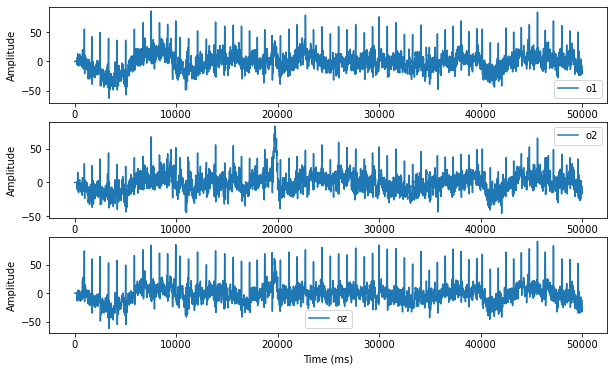

In [35]:
fig, ax = plt.subplots(3,1, figsize=[10, 6])
for i, column in enumerate(l2.columns):
    ax[i].plot(column, data=l2, label=column)
    ax[i].set_ylabel("Amplitude")
    ax[i].legend()
plt.xlabel("Time (ms)")
plt.show()

In [36]:
Fs = 1000       # sampling frequency
T = 1/Fs        # sampling period
N = len(l2)     # number of individual samples
t = N*T         # time vector (s)

scipy.fftpack.fft is an implementation of the Fast Fourier Transform (FFT), which is an efficient algorithm for calculating the Discrete Fourier Transform (DFT).

If you pass in a time-domain signal of length  N  scipy.fftpack.fft, you will get back a frequency-domain signal of length  N .

The first  N2  samples in the frequency domain represent the DFT values at equally spaced positive frequencies in  [0,fs/2) .
The last  N2  samples represent the DFT values at equally spaced negative frequencies in  [−fs/2,0) .
If the time-domain signal is real-valued, then the DFT values at negative frequencies will be the complex conjugates of the DFT values at positive frequencies. So all of the information is contained in the first half of the DFT for a real-valued signal.

In [37]:
f2 = fft(l2) 
y = np.abs(f2[0:int(N/2)])
freq2 = np.arange(0, Fs/2, step=Fs/N) # np.arrage(start, end, stepsize) -> freq = fftfreq(N, 1/Fs)[0:int(N/2)]

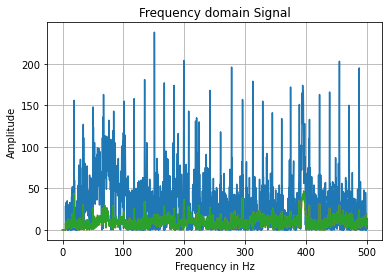

In [38]:
plt.plot(freq2, y)
plt.title("Frequency domain Signal")
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

### Extracting EEG Epochs as Samples

In [42]:
Fs = 1000
N = len(l2)
freq_res = Fs / N # frequency resolution: minimum change in frequency that FFT can detect
freq_res

0.02

In [ ]:
Fs = 1000           # sampling frequency
N = len(l2)         # number of samples
T = 10              # stimulus time
T1 = 2              # fft window length
T2 = 0.25           # fft step length
T3 = (T-T1)/T2+1    # number of fft samples per stimulus 
T4 = T3*n_stimulus  # total number of fft samples

NFFT = 8192           
T_interval=T/T2

In [27]:
sessions=4 # number of files
 
Fs = 1000 # sampling frequency
trials = 5 # 
T = 10 # trial time
T1 = 2 # fft window length
T2 = 0.25 # step length
T3 = (T-T1)/T2+1 # command number per every stimulus 
T4 = T3*samples # total number commands

NFFT=8192 #sample*T*Fs
T_interval=T/T2

In [29]:
5/0.25

20.0

In [ ]:


for N=1:4
   eval(['load(''C:\Users\Luojie\Documents\Thesis\Data\SSVEP Data of Two Subjects\Subject 5','\Finalleft',num2str(N),'.mat'');']);
   eval(['load(''C:\Users\Luojie\Documents\Thesis\Data\SSVEP Data of Two Subjects\Subject 5','\Finalright',num2str(N),'.mat'');']);
end
for N=1:files;
%%
    for i=1:T5
        eval(['frequency1= abs(fft(Finalleft',num2str(N),'(((T2*Fs*(i-1)+1):(T1*Fs+T2*Fs*(i-1))),:), NFFT));']);

In [265]:
for i in range(0, int(T4)):
    print(abs(fft(l2[int(T2*Fs*(i)+1): int(T1*Fs+T2*Fs*(i-1))], NFFT)))

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [78.         77.99998241 77.99992965 ... 77.99984171 77.99992965
  77.99998241]
 [77.         76.99998268 76.99993072 ... 76.99984412 76.99993072
  76.99998268]
 [78.         77.99998237 77.99992947 ... 77.9998413  77.99992947
  77.99998237]]
[[25.         24.99999605 24.99998419 ... 24.99996442 24.99998419
  24.99999605]
 [21.         20.99999678 20.99998711 ... 20.99997101 20.99998711
  20.99999678]
 [18.         17.99999752 17.99999006 ... 17.99997765 17.99999006
  17.99999752]
 ...
 [11.         10.99999679 10.99998716 ... 10.99997112 10.99998716
  10.99999679]
 [15.         14.9999962  14.99998478 ... 14.99996576 14.99998478
  14.9999962 ]
 [18.         17.9999956  17.99998242 ... 17.99996044 17.99998242
  17.9999956 ]]
[[ 9.          8.99999915  8.9999966  ..

In [25]:
for i in range(0, int(T5)):    
    print((T2*Fs*(i)+1))

1.0
501.0
1001.0
1501.0
2001.0
2501.0
3001.0
3501.0
4001.0
4501.0
5001.0
5501.0
6001.0
6501.0
7001.0
7501.0
8001.0
8501.0
9001.0
9501.0
10001.0
10501.0
11001.0
11501.0
12001.0
12501.0
13001.0
13501.0
14001.0
14501.0
15001.0
15501.0
16001.0
16501.0
17001.0
17501.0
18001.0
18501.0
19001.0
19501.0
20001.0
20501.0
21001.0
21501.0
22001.0
22501.0
23001.0
23501.0
24001.0
24501.0
25001.0
25501.0
26001.0
26501.0
27001.0
27501.0
28001.0
28501.0
29001.0
29501.0
30001.0
30501.0
31001.0
31501.0
32001.0
32501.0
33001.0
33501.0
34001.0
34501.0
35001.0
35501.0
36001.0
36501.0
37001.0
37501.0
38001.0
38501.0
39001.0
39501.0
40001.0
40501.0
41001.0
41501.0
42001.0
42501.0
43001.0
43501.0
44001.0
44501.0
45001.0
45501.0
46001.0
46501.0
47001.0
47501.0
48001.0
48501.0
49001.0
49501.0
50001.0
50501.0
51001.0
51501.0
52001.0
52501.0
53001.0
53501.0
54001.0
54501.0
55001.0
55501.0
56001.0
56501.0
57001.0
57501.0
58001.0
58501.0
59001.0
59501.0
60001.0
60501.0
61001.0
61501.0
62001.0
62501.0
63001.0
63501.0


In [26]:
for i in range(0, int(T5)):
    print((T1*Fs+T2*Fs*(i-1)))

3500.0
4000.0
4500.0
5000.0
5500.0
6000.0
6500.0
7000.0
7500.0
8000.0
8500.0
9000.0
9500.0
10000.0
10500.0
11000.0
11500.0
12000.0
12500.0
13000.0
13500.0
14000.0
14500.0
15000.0
15500.0
16000.0
16500.0
17000.0
17500.0
18000.0
18500.0
19000.0
19500.0
20000.0
20500.0
21000.0
21500.0
22000.0
22500.0
23000.0
23500.0
24000.0
24500.0
25000.0
25500.0
26000.0
26500.0
27000.0
27500.0
28000.0
28500.0
29000.0
29500.0
30000.0
30500.0
31000.0
31500.0
32000.0
32500.0
33000.0
33500.0
34000.0
34500.0
35000.0
35500.0
36000.0
36500.0
37000.0
37500.0
38000.0
38500.0
39000.0
39500.0
40000.0
40500.0
41000.0
41500.0
42000.0
42500.0
43000.0
43500.0
44000.0
44500.0
45000.0
45500.0
46000.0
46500.0
47000.0
47500.0
48000.0
48500.0
49000.0
49500.0
50000.0
50500.0
51000.0
51500.0
52000.0
52500.0
53000.0
53500.0
54000.0
54500.0
55000.0
55500.0
56000.0
56500.0
57000.0
57500.0
58000.0
58500.0
59000.0
59500.0
60000.0
60500.0
61000.0
61500.0
62000.0
62500.0
63000.0
63500.0
64000.0
64500.0
65000.0
65500.0
66000.0
66500